In [1]:
import ROOT
import uproot
import matplotlib.pyplot as plt
import scipy as scp
from scipy.integrate import trapezoid
import numpy as np
import awkward as ak


Welcome to JupyROOT 6.30/04


In [3]:
FILE_PATH_ELE = "../Dati/Run_Na_Prva_Data_5_9_2024_Ascii_0000.root" #Relative file path
FILE_PATH_MARTI = "../Dati/Run_internal_no_source_Data_5_9_2024_Ascii.root" #Relative file path
file = uproot.open(FILE_PATH_ELE)
file["tree"].show() #Display contents

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
ev                   | int32_t                  | AsDtype('>i4')
nch                  | int32_t                  | AsDtype('>i4')
ch                   | int32_t[]                | AsJagged(AsDtype('>i4'))
base                 | float[]                  | AsJagged(AsDtype('>f4'))
amp                  | float[]                  | AsJagged(AsDtype('>f4'))
charge               | float[]                  | AsJagged(AsDtype('>f4'))
letime               | float[]                  | AsJagged(AsDtype('>f4'))
tetime               | float[]                  | AsJagged(AsDtype('>f4'))
pshape               | float[][1024]            | AsJagged(AsDtype("('>f4', (...


In [4]:
waveform = np.array(file["tree"]["pshape"].array()[:-1])
print(waveform.shape)
std_devs=np.zeros( (20000, 16) )

std_devs=np.std(waveform, axis=2)
print(std_devs.shape)

std_means=np.mean(std_devs, axis=0)

(7999, 2, 1024)
(7999, 2)


In [6]:
baselines = np.array(file["tree"]["base"].array()) 
charges = np.array(file["tree"]["charge"].array())
amp = np.array(file["tree"]["amp"].array())
lead_edge = np.array(file["tree"]["letime"].array())
t_edge = np.array(file["tree"]["tetime"].array())
channel= np.array(file["tree"]["ch"].array())
waveform = np.array(file["tree"]["pshape"].array())

In [14]:
print(std_means.shape)
print(std_means)

(16,)
[0.00146046 0.00080266 0.00080036 0.00086336 0.00081332 0.00080123
 0.00086653 0.00078382 0.0022469  0.0009465  0.00103487 0.00105601
 0.00147908 0.00074666 0.00082993 0.00084697]


(array([[   0.,    0.,    0.,    0.,    0., 8000.,    0.,    0.,    0.,
            0.],
        [   0.,    0.,    0.,    0.,    0., 8000.,    0.,    0.,    0.,
            0.]]),
 array([-0.5       , -0.40000001, -0.30000001, -0.2       , -0.1       ,
         0.        ,  0.1       ,  0.2       ,  0.30000001,  0.40000001,
         0.5       ]),
 <a list of 2 BarContainer objects>)

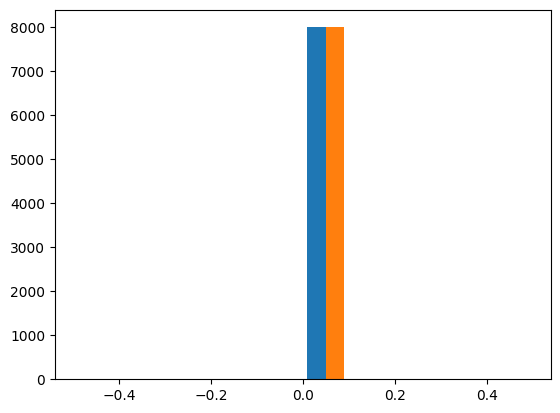

In [7]:
plt.hist(charges)

In [15]:
print(1.4*3)

4.199999999999999
